# A unit test notebook for the Shash class in shash_tfp.py

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import scipy
import tensorflow as tf

from shash_tfp import Shash

__author__ = "Randal J. Barnes and Elizabeth A. Barnes"
__date__ = "07 April 2022"

# Verify our understanding of the tfp formulation.

We compute and plot the pdf defined by Tensorflow (i.e. using the tfp parameters and formulation) over a broad range. Then we compute and plot the pdf defined by Jones and Pewsey after converting the tfp parameters to the Jones and Pewsey parameters.  The two plots should be indistinguishable.

2022-04-07 13:43:33.689038: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


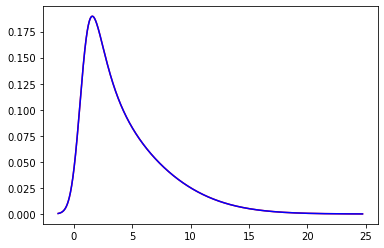

In [2]:
TWO_PI = 6.2831853071795864769252868

loc = 1.0
scale = 2.0
skewness = 1.0
tailweight = 1.1

dist = Shash(loc=loc, scale=scale, skewness=skewness, tailweight=tailweight)

lb = dist.quantile(0.0001)
ub = dist.quantile(0.9999)
x = tf.cast(tf.linspace(lb, ub, 10000), dtype=tf.float32)

f = dist.prob(x)

xi, eta, epsilon, delta = dist._convert_tfp_to_jones_and_pewsey()

y = (x - xi) / eta
Ssqr = tf.math.square(tf.math.sinh(delta * tf.math.asinh(y) - epsilon))
ff = (
    delta
    / eta
    * tf.math.sqrt((1.0 + Ssqr) / (TWO_PI * (1.0 + tf.math.square(y))))
    * tf.math.exp(-Ssqr / 2.0)
)

plt.plot(x, f, "-r", x, ff, "-b")

# Test Shash.mean (not available in tfp) by comparing to numerical integration.

We consider the shash4, shash3, and shash2 cases separately.

## CASE: shash4

In [3]:
NTEST = 100
NN = 100000

# CASE: Shash4
loc = tf.random.uniform(shape=[NTEST, 1], minval=-1, maxval=1)
scale = tf.random.uniform(shape=[NTEST, 1], minval=1, maxval=2)
skewness = tf.random.uniform(shape=[NTEST, 1], minval=-1, maxval=1)
tailweight = tf.random.uniform(shape=[NTEST, 1], minval=1, maxval=2)

dist = Shash(loc=loc, scale=scale, skewness=skewness, tailweight=tailweight)

lb = dist.quantile(0.00001 * tf.ones(shape=[NTEST, 1]))
ub = dist.quantile(0.99999 * tf.ones(shape=[NTEST, 1]))
xx = tf.linspace(lb, ub, NN)
ff = dist.prob(xx)
mean_numeric = tf.reduce_mean(xx * ff, axis=0) * (ub - lb)
mean_analytic = dist.mean()

error = mean_analytic - mean_numeric
print(f"shash4: max mean |error| = {tf.math.reduce_max(tf.math.abs(error)):.6f}")

shash4: max mean |error| = 0.001294


## CASE: shash3

In [4]:
NTEST = 100
NN = 100000

loc = tf.random.uniform(shape=[NTEST, 1], minval=-1, maxval=1)
scale = tf.random.uniform(shape=[NTEST, 1], minval=1, maxval=2)
skewness = tf.random.uniform(shape=[NTEST, 1], minval=-1, maxval=1)

dist = Shash(loc=loc, scale=scale, skewness=skewness)

lb = dist.quantile(0.00001 * tf.ones(shape=[NTEST, 1]))
ub = dist.quantile(0.99999 * tf.ones(shape=[NTEST, 1]))
xx = tf.linspace(lb, ub, NN)
ff = dist.prob(xx)
mean_numeric = tf.reduce_mean(xx * ff, axis=0) * (ub - lb)
mean_analytic = dist.mean()

error = mean_analytic - mean_numeric
print(f"shash3: max mean |error| = {tf.math.reduce_max(tf.math.abs(error)):.6f}")

shash3: max mean |error| = 0.000402


## CASE: shash2

In [5]:
NTEST = 100
NN = 100000

loc = tf.random.uniform(shape=[NTEST, 1], minval=-1, maxval=1)
scale = tf.random.uniform(shape=[NTEST, 1], minval=1, maxval=2)

dist = Shash(loc=loc, scale=scale)

lb = dist.quantile(0.00001 * tf.ones(shape=[NTEST, 1]))
ub = dist.quantile(0.99999 * tf.ones(shape=[NTEST, 1]))
xx = tf.linspace(lb, ub, NN)
ff = dist.prob(xx)
mean_numeric = tf.reduce_mean(xx * ff, axis=0) * (ub - lb)
mean_analytic = dist.mean()

error = mean_analytic - mean_numeric
print(f"shash2: max mean |error| = {tf.math.reduce_max(tf.math.abs(error)):.6f}")

shash2: max mean |error| = 0.000062


# Test Shash.median (not available in tfp) by comparing to the 50 percentile.

In [6]:
NTEST = 100

loc = tf.random.uniform(shape=[NTEST, 1], minval=-1, maxval=1)
scale = tf.random.uniform(shape=[NTEST, 1], minval=1, maxval=2)
skewness = tf.random.uniform(shape=[NTEST, 1], minval=-1, maxval=1)
tailweight = tf.random.uniform(shape=[NTEST, 1], minval=1, maxval=2)

dist = Shash(loc=loc, scale=scale, skewness=skewness, tailweight=tailweight)

median_quantile = dist.quantile(0.5)
median_analytic = dist.median()

error = median_analytic - median_quantile
print(f"max median |error| = {tf.math.reduce_max(tf.math.abs(error)):.6f}")

max median |error| = 0.000000


# Test Shash.variance (not available in tfp) by comparing to numerical integration.

In [7]:
NTEST = 100
NN = 100000

loc = tf.random.uniform(shape=[NTEST, 1], minval=-1, maxval=1)
scale = tf.random.uniform(shape=[NTEST, 1], minval=1, maxval=2)
skewness = tf.random.uniform(shape=[NTEST, 1], minval=-1, maxval=1)
tailweight = tf.random.uniform(shape=[NTEST, 1], minval=1, maxval=2)

dist = Shash(loc=loc, scale=scale, skewness=skewness, tailweight=tailweight)

lb = dist.quantile(0.00001 * tf.ones(shape=[NTEST, 1]))
ub = dist.quantile(0.99999 * tf.ones(shape=[NTEST, 1]))
xx = tf.linspace(lb, ub, NN)
ff = dist.prob(xx)

mu = tf.reduce_mean(xx * ff, axis=0) * (ub - lb)
variance_numeric = tf.reduce_mean(tf.math.square(xx - mu) * ff, axis=0) * (ub - lb)
variance_analytic = dist.variance()

error = variance_analytic - variance_numeric
print(f"max variance |error| = {tf.math.reduce_max(tf.math.abs(error)):.6f}")

max variance |error| = 0.069258


# Test Shash.skewness (not available in tfp) by comparing to numerical integration.

In [8]:
NTEST = 100
NN = 100000

loc = tf.random.uniform(shape=[NTEST, 1], minval=-1, maxval=1)
scale = tf.random.uniform(shape=[NTEST, 1], minval=1, maxval=2)
skewness = tf.random.uniform(shape=[NTEST, 1], minval=-1, maxval=1)
tailweight = tf.random.uniform(shape=[NTEST, 1], minval=1, maxval=2)

dist = Shash(loc=loc, scale=scale, skewness=skewness, tailweight=tailweight)

lb = dist.quantile(0.00001 * tf.ones(shape=[NTEST, 1]))
ub = dist.quantile(0.99999 * tf.ones(shape=[NTEST, 1]))
xx = tf.linspace(lb, ub, NN)
ff = dist.prob(xx)

mu = tf.reduce_mean(xx * ff, axis=0) * (ub - lb)
sigma = tf.math.sqrt(tf.reduce_mean(tf.math.square(xx - mu) * ff, axis=0) * (ub - lb))
skewness_numeric = (
    tf.reduce_mean(tf.math.square(xx - mu) * (xx - mu) * ff, axis=0) * (ub - lb)
) / (sigma * sigma * sigma)
skewness_analytic = dist.skewness()

error = skewness_analytic - skewness_numeric
print(f"max skewness |error| = {tf.math.reduce_max(tf.math.abs(error)):.6f}")

max skewness |error| = 0.028737


# Time the various methods.

In [9]:
NTEST = 100

loc = tf.random.uniform(shape=[NTEST, 1], minval=-1, maxval=1)
scale = tf.random.uniform(shape=[NTEST, 1], minval=1, maxval=2)
skewness = tf.random.uniform(shape=[NTEST, 1], minval=-1, maxval=1)
tailweight = tf.random.uniform(shape=[NTEST, 1], minval=1, maxval=2)

dist = Shash(loc=loc, scale=scale, skewness=skewness, tailweight=tailweight)

%timeit dist.mean()
%timeit dist.median()
%timeit dist.skewness()
%timeit dist.stddev()
%timeit dist.variance()

96.1 ms ± 959 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
183 µs ± 3.41 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
398 ms ± 6.86 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
207 ms ± 4.09 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
214 ms ± 8.48 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
